# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [22]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [23]:
clean_data=pd.read_csv('cleaned_aviation_data.csv')
clean_data.head(100)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Occupants,SumFatalSerious.Injuries,FatalSeriousInjury.Rate,Aircraft.Destroyed,MakeModel
0,20001214X42095,Accident,SEA83LA036,1983-01-01,"NEWPORT, OR",United States,ONP,NEWPORT MUNICIPAL,Non-Fatal,SUBSTANTIAL,...,3.0,vmc,approach,Probable Cause,NaN,4.0,0.0,0.000000,0,cessna 182P
1,20001214X42067,Accident,MKC83LA056,1983-01-01,"WOODBINE, IA",United States,3YR,MUNICIPAL,Non-Fatal,SUBSTANTIAL,...,2.0,vmc,landing,Probable Cause,NaN,2.0,0.0,0.000000,0,cessna 182RG
2,20001214X42063,Accident,MKC83LA050,1983-01-01,"MARYVILLE, MO",United States,78Y,RANKIN,Non-Fatal,SUBSTANTIAL,...,1.0,vmc,takeoff,Probable Cause,NaN,1.0,0.0,0.000000,0,cessna 182P
3,20001214X42018,Accident,LAX83FUG11,1983-01-01,"UPLAND, CA",United States,CCB,CABLE,Non-Fatal,SUBSTANTIAL,...,0.0,vmc,approach,Probable Cause,NaN,2.0,0.0,0.000000,0,piper PA-28R-200
4,20001214X41951,Accident,CHI83LA074,1983-01-01,"SPRINGBROOK, WI",United States,NaN,SPRINGBROOK,Non-Fatal,SUBSTANTIAL,...,2.0,vmc,landing,Probable Cause,NaN,2.0,0.0,0.000000,0,cessna 140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,20001214X42022,Accident,LAX83FVM07,1983-01-16,"SAN JOSE, CA",United States,RHV,REID-HILLVIEW,Non-Fatal,SUBSTANTIAL,...,1.0,imc,landing,Probable Cause,NaN,1.0,0.0,0.000000,0,pitts S1S
96,20001214X42001,Accident,FTW83LA089,1983-01-16,"LOREAUVILLE, LA",United States,NaN,WIND MILL,Non-Fatal,SUBSTANTIAL,...,2.0,vmc,takeoff,Probable Cause,NaN,3.0,1.0,0.333333,0,cessna A185F
97,20001214X41985,Accident,FTW83FA088,1983-01-16,"CARROLLTON, TX",United States,ADS,ADDISON,Non-Fatal,SUBSTANTIAL,...,2.0,vmc,approach,Probable Cause,NaN,3.0,1.0,0.333333,0,cessna 172N
98,20001214X41958,Accident,CHI83LA084,1983-01-16,"WHEATON, IL",United States,NaN,NaN,Non-Fatal,SUBSTANTIAL,...,2.0,vmc,cruise,Probable Cause,NaN,2.0,0.0,0.000000,0,cessna 182


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [24]:
clean_data["Aircraft.Size"] = np.where(clean_data["Total.Occupants"] >= 20,"large","small")

#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [25]:
clean_data['FatalSeriousInjury.Rate'].info()
clean_data['Aircraft.Size'].info()
#get rid of rows where injury rate or aircraft size is null 

clean_data=clean_data.dropna(subset=['FatalSeriousInjury.Rate','Aircraft.Size'])

#make two dataframes, one for small aircraft the other for large: 
small_aircraft_data=clean_data[clean_data['Aircraft.Size']=="small"]
large_aircraft_data=clean_data[clean_data['Aircraft.Size']=="large"]

#create two dataframes with the makes and means of injury rates (one for small and one for large aircraft)
small_make_injury_rate_mean = (
    small_aircraft_data
    .groupby("Make")["FatalSeriousInjury.Rate"]
    .mean()
    .reset_index(name="mean_fatalserious_rate")
)
large_make_injury_rate_mean= (
    large_aircraft_data
    .groupby("Make")["FatalSeriousInjury.Rate"]
    .mean()
    .reset_index(name="mean_fatalserious_rate")
)
#Choose the 15 makes for each group (large and small airctaft) with the lowest injury rate means: 
lowest_means_small= small_make_injury_rate_mean.nsmallest(15,"mean_fatalserious_rate")
lowest_means_large= large_make_injury_rate_mean.nsmallest(15,'mean_fatalserious_rate')


<class 'pandas.core.series.Series'>
RangeIndex: 68438 entries, 0 to 68437
Series name: FatalSeriousInjury.Rate
Non-Null Count  Dtype  
--------------  -----  
67829 non-null  float64
dtypes: float64(1)
memory usage: 534.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 68438 entries, 0 to 68437
Series name: Aircraft.Size
Non-Null Count  Dtype 
--------------  ----- 
68438 non-null  object
dtypes: object(1)
memory usage: 534.8+ KB


In [70]:
figa, (ax1,ax2)=plt.subplots(1,2,figsize=(14,5),sharey=True)

ax1.bar(lowest_means_small['Make'],lowest_means_small['mean_fatalserious_rate'])
ax1.set_title("Small Aircraft: Makes with Lowest 15 Injury Rates")
ax1.set_xlabel("Make")
ax1.set_ylabel('Mean Injury Rate')
ax1.tick_params(axis="x", rotation=90)

ax2.bar(lowest_means_large['Make'],lowest_means_large['mean_fatalserious_rate'])
ax2.set_title('Large Aircraft: Makes with Lowest 15 Injury Rates')
ax2.set_xlabel("Make")
ax2.set_ylabel('Mean Injury Rate')
ax2.tick_params(axis="x", rotation=90)

figa.tight_layout()
figa.savefig("plots3/small_large_aircraft_injury_rate.png", dpi=150, bbox_inches="tight")
plt.close(figa)


**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [71]:
#choose lowest 10 from small by mean
lowest_means_small_ten= small_make_injury_rate_mean.nsmallest(10,"mean_fatalserious_rate")
lowest_10_makes=lowest_means_small_ten['Make']

#all small plane rows for that make:
small_subset=small_aircraft_data[small_aircraft_data['Make'].isin(lowest_10_makes)]

sns.violinplot(
    data=small_subset,
    x="Make",
    y="FatalSeriousInjury.Rate"
)
plt.title("Small Aircraft: Makes with Lowest 10 Injury Rates")
plt.ylabel('Mean Injury Rate')
plt.xlabel('Make')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("plots3/small_aircraft_makes_injury_rate.png", dpi=150, bbox_inches="tight")
plt.close()




**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [72]:
lowest_means_large_ten= large_make_injury_rate_mean.nsmallest(10,"mean_fatalserious_rate")
lowest_10_makes_large=lowest_means_large_ten['Make']

#all small plane rows for that make:
large_subset=large_aircraft_data[large_aircraft_data['Make'].isin(lowest_10_makes_large)]

sns.stripplot(
    data=large_subset,
    x="Make",
    y="FatalSeriousInjury.Rate")
plt.title("Large Aircraft: Makes with Lowest 10 Injury Rates")
plt.ylabel('Mean Injury Rate')
plt.xlabel('Make')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("plots3/large_aircraft_makes_injury_rate.png", dpi=150, bbox_inches="tight")
plt.close()


**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [32]:
#ensure no missing values for needed columns: Aircraft size,make,destroyed

clean_data_2=clean_data.dropna(subset=['Aircraft.Size','Make','Aircraft.Destroyed'])


#write a function to calculate destruction rate 
#function filters data on aircraft size (depending what param you set (small,large) and then takes groups by make and takes the mean of the 0 and 1 to give you a destruction rate per make. then the function takes the smallest 15 rates 

def destruction_rate(size):
    return(
        clean_data_2[clean_data_2['Aircraft.Size']==size].groupby('Make')['Aircraft.Destroyed'].mean().reset_index(name="destruction_rate").nsmallest(15,'destruction_rate'))
#pass small and large params into function 

small_destroy_rate=destruction_rate('small')
large_destroy_rate=destruction_rate('large')

print(small_destroy_rate)
print(large_destroy_rate)



                              Make  destruction_rate
46  grumman acft eng cor-schweizer          0.017241
10      american champion aircraft          0.037736
12              aviat aircraft inc          0.039474
31                     dehavilland          0.042105
32        diamond aircraft ind inc          0.054054
40              flight design gmbh          0.060000
73             robinson helicopter          0.061674
20                      bombardier          0.062500
56                             let          0.080882
74     robinson helicopter company          0.084656
11                           aviat          0.085714
90                            waco          0.086331
41                          fokker          0.090909
36                         ercoupe          0.094595
59                           maule          0.094737
                         Make  destruction_rate
0              aero commander          0.000000
12                dehavilland          0.000000
18      

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

It is clear that small airplanes are more likely to be destroyed in accidents than large ones. Insurance rates for small airplanes in general should probably be higher than for large ones. 
The small airplanes least likely to be destroyed are manufactured by grumman acft eng cor-schweizer,american champion aircraft,aviat aircraft inc,dehavilland,diamond aircraft ind inc,flight design gmbh, robinson helicopter,bombardier,let,robinson helicopter company,aviat, waco,fokker,ercoupe, and maule. Insurance rates for these makes may be lower. 

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

In [34]:
#subset that ensures no null values for relevant columns
sub = clean_data.dropna(subset=["Aircraft.Size", "MakeModel", "FatalSeriousInjury.Rate"])

In [74]:
large = sub[sub["Aircraft.Size"] == "large"]
large_counts = large.groupby("MakeModel").size().reset_index(name="count")
large_more_than_10 = large_counts[large_counts["count"] >= 10]["MakeModel"]
large_filtered = large[large["MakeModel"].isin(large_more_than_10)]

large_mean = large_filtered["FatalSeriousInjury.Rate"].mean()  
fig_large, ax_large = plt.subplots(figsize=(16, 6))

sns.violinplot(
    data=large_filtered,
    x="MakeModel",
    y="FatalSeriousInjury.Rate",
    ax=ax_large,   # draw on this axis
)

ax_large.set_title("Large aircraft: Injury Rate by Plane Type")
ax_large.set_ylabel("Injury Rate")
ax_large.set_xlabel("Plane Type")
ax_large.tick_params(axis="x", rotation=90)

fig_large.tight_layout()
fig_large.savefig("plots3/large_aircraft_injury_rate_by_plane_type.png",
                  dpi=150, bbox_inches="tight")
plt.close(fig_large)



**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

In [79]:
small = sub[sub["Aircraft.Size"] == "small"]
small_counts = small.groupby("MakeModel").size().reset_index(name="count")
small_more_than_10 = small_counts[small_counts["count"] >= 10]["MakeModel"]
small_filtered = small[small["MakeModel"].isin(small_more_than_10)]

small_means = (
    small_filtered
    .groupby("MakeModel")["FatalSeriousInjury.Rate"]
    .mean()
    .reset_index(name="mean_rate")
)
#limit to lowest ten
lowest_10_models = small_means.nsmallest(10, "mean_rate")["MakeModel"]
data_for_small_plot = small_filtered[small_filtered["MakeModel"].isin(lowest_10_models)]

fig_small, ax_small = plt.subplots(figsize=(16, 6))

sns.violinplot(
    data=data_for_small_plot,
    x="MakeModel",
    y="FatalSeriousInjury.Rate",
    ax=ax_small,   )


ax_small.set_title("Small aircraft: Injury Rate by Plane Type")
ax_small.set_ylabel("Injury Rate")
ax_small.set_xlabel("Plane Type")
ax_small.tick_params(axis="x", rotation=90)

fig_small.tight_layout()
fig_small.savefig(
    "plots3/small_aircraft_plane_type_injury_rate.png",
    dpi=150,
    bbox_inches="tight",
)
plt.close(fig_small)




### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

For large planes: 
Highest average injury rate is in Boeing 737-200 and Mcdonnell Douglas DC-9-32. 

For small planes: 
Highest average injury rate is in burkhart grub g103, maule MX-7-235,grumman-schweizer G-164A, air tractor AT 602

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

Weather conditions: Small planes

In [ ]:
wd = clean_data.dropna(subset=["Aircraft.Size", "Weather.Condition", "Aircraft.Destroyed"])


def weather_destruction(size):
    return (
        wd[wd["Aircraft.Size"] == size]
        .groupby("Weather.Condition")["Aircraft.Destroyed"]
        .mean()                              
        .reset_index(name="destruction_rate")
    )

small_weather = weather_destruction("small")
large_weather = weather_destruction("large")



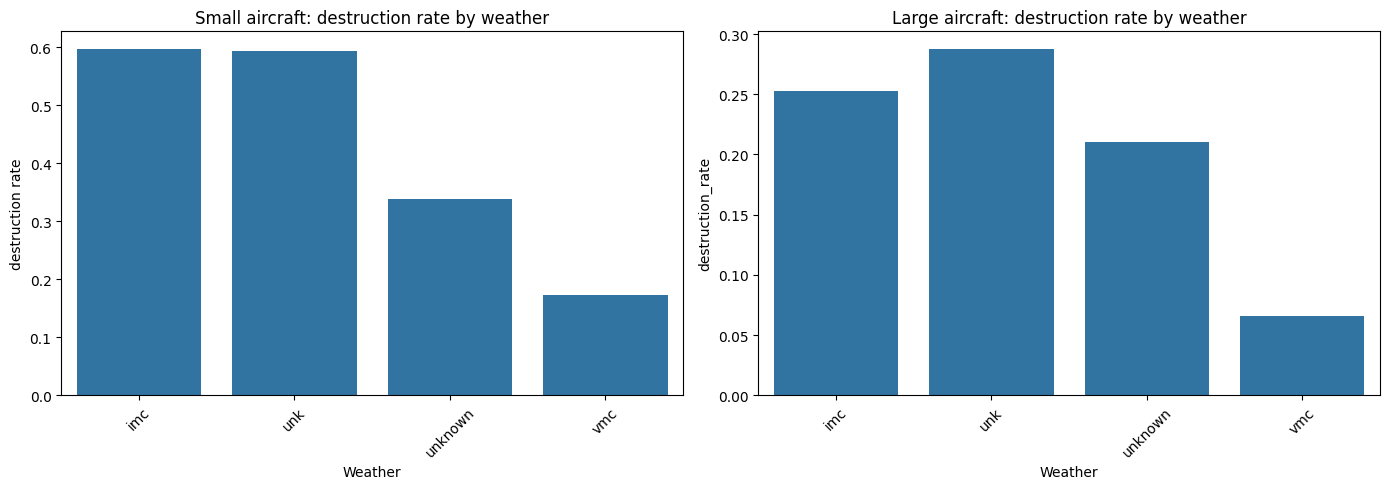

In [80]:
fig6, (ax1,ax2)=plt.subplots(1,2,figsize=(14,5))

sns.barplot(
    data=small_weather,
    x="Weather.Condition",
    y="destruction_rate",
    ax=ax1
)
ax1.set_title("Small aircraft: destruction rate by weather")
ax1.set_xlabel("Weather")
ax1.set_ylabel("destruction rate")
ax1.tick_params(axis="x", rotation=45, )

sns.barplot(
    data=large_weather,
    x="Weather.Condition",
    y="destruction_rate",
    ax=ax2
)
ax2.set_title("Large aircraft: destruction rate by weather")
ax2.set_xlabel("Weather")
ax2.tick_params(axis="x", rotation=45,)

plt.tight_layout()
plt.show()


fig6.tight_layout()
fig6.savefig("plots3/small_large_aircraft_weather_destruction_rate.png", dpi=150, bbox_inches="tight")
plt.close(fig6)


Engine Type:  

In [83]:
eng = clean_data.dropna(
    subset=["Engine.Type", "FatalSeriousInjury.Rate"]
)

#get rid of rows where engine type = unknown
eng = eng[eng["Engine.Type"] != "unknown"]

# mean injury rate by engine type
engine_injury = (
    eng.groupby("Engine.Type")["FatalSeriousInjury.Rate"]
    .mean()
    .reset_index(name="mean_injury_rate")
)

fig_eng, ax_eng = plt.subplots(figsize=(6, 5))

sns.barplot(
    data=engine_injury,
    x="Engine.Type",
    y="mean_injury_rate",
    ax=ax_eng,  # draw on this axis
)

ax_eng.set_title("Mean injury rate by engine type")
ax_eng.set_ylabel("Injury Rate")
ax_eng.set_xlabel("Engine type")
ax_eng.tick_params(axis="x", rotation=45)

fig_eng.tight_layout()
fig_eng.savefig(
    "plots3/aircraft_enginetype_injury_rate.png",
    dpi=150,
    bbox_inches="tight",
)
plt.close(fig_eng)

